# Iteration Tests

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from dpsim.MeasurementUtils import Measurement
import numpy as np

How many iterations are required per simulation scenario?

In [1]:
logs_dir = '../../../dpsim-logs/logs_rt_char/'
decoupled_meas = []
copies = 10
threads = 8
 
for seq in range(1,1001):    
    sim_dir = logs_dir + 'WSCC_9bus_decoupled_' + str(copies) + '_' + str(threads) + '_' + str(seq) + '/'
    log_name = 'WSCC_9bus_decoupled_' + str(copies) + '_' + str(threads) + '_' + str(seq) + '_step_times.log'
    log_path = sim_dir + log_name
    #print(log_path)            
    meas = Measurement.read_timestep_csv(log_path)
    decoupled_meas.append({'copies': copies, 'threads': threads, 'sequence': seq, 'values': meas['step_time'].data})         

pd_decoupled_meas = pd.DataFrame(decoupled_meas)

How many start steps should be disregarded?

In [2]:
#for seq in range(1,1001):
#    if pd_decoupled_meas.query('sequence == ' + str(seq))['values'].values[0][10:].argmax() == 0:
#        print('first entry')    

Dropping the first ten values seems to be reasonable.  
How many simulations need to be considered to calculate the maximum?

In [7]:
decoupled_max = []
absolute_max = 0
for seq in range(1,1001):
    current_max = pd_decoupled_meas.query('sequence == ' + str(seq))['values'].values[0][10:].max()
    if current_max > absolute_max:
        absolute_max = current_max
    decoupled_max.append(absolute_max) 

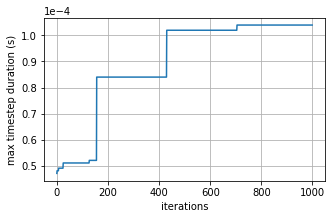

In [28]:
plt.figure(figsize=(12/2.54,8/2.54))
plt.plot(decoupled_max)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
plt.xlabel('iterations')
plt.ylabel('max timestep duration (s)')
plt.grid()
plt.tight_layout()

plt.savefig('wscc_9bus_iter_rt_max.pdf')
pd_decoupled_max_iterations = pd.DataFrame(decoupled_max)
pd_decoupled_max_iterations.to_csv('pd_decoupled_max_iterations.csv')

How many simulations to determine mean and variance?

In [9]:
decoupled_concat = []
decoupled_concat.append(pd_decoupled_meas.query('sequence == 1')['values'].values[0][10:])

for seq in range(2,1001):
    decoupled_concat.append( np.concatenate( (decoupled_concat[-1], pd_decoupled_meas.query('sequence == ' + str(seq))['values'].values[0][10:]), axis=0 ) )

In [10]:
decoupled_mean = []
for seq in range(0,1000):
    decoupled_mean.append(decoupled_concat[seq].mean())

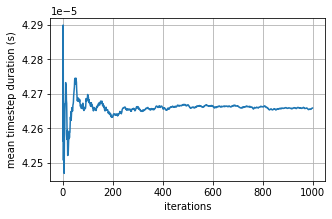

In [29]:
plt.figure(figsize=(12/2.54,8/2.54))
plt.plot(decoupled_mean)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
plt.xlabel('iterations')
plt.ylabel('mean timestep duration (s)')
plt.grid()
plt.tight_layout()

plt.savefig('wscc_9bus_iter_rt_mean.pdf')
pd_decoupled_mean_iterations = pd.DataFrame(decoupled_mean)
pd_decoupled_mean_iterations.to_csv('pd_decoupled_mean_iterations.csv')

In [12]:
decoupled_std = []
for seq in range(0,1000):    
    decoupled_std.append(decoupled_concat[seq].std())

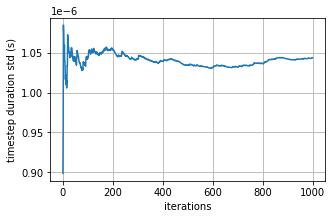

In [30]:
plt.figure(figsize=(12/2.54,8/2.54))
plt.plot(decoupled_std)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
plt.xlabel('iterations')
plt.ylabel('timestep duration std (s)')
plt.grid()
plt.tight_layout()

plt.savefig('wscc_9bus_iter_rt_std.pdf')
pd_decoupled_std_iterations = pd.DataFrame(decoupled_std)
pd_decoupled_std_iterations.to_csv('pd_decoupled_std_iterations.csv')

## throughput performance profile

In [17]:
logs_dir = '../../../dpsim-logs/logs_tp_char/'
tp_decoupled_meas = []
copies = 10
threads = 8
 
for seq in range(1,1001):    
    sim_dir = logs_dir + 'WSCC_9bus_decoupled_' + str(copies) + '_' + str(threads) + '_' + str(seq) + '/'
    log_name = 'WSCC_9bus_decoupled_' + str(copies) + '_' + str(threads) + '_' + str(seq) + '_step_times.log'
    log_path = sim_dir + log_name
    #print(log_path)            
    meas = Measurement.read_timestep_csv(log_path)
    tp_decoupled_meas.append({'copies': copies, 'threads': threads, 'sequence': seq, 'values': meas['step_time'].data})         

tp_pd_decoupled_meas = pd.DataFrame(tp_decoupled_meas)

In [18]:
tp_decoupled_max = []
absolute_max = 0
for seq in range(1,1000):
    current_max = tp_pd_decoupled_meas.query('sequence == ' + str(seq))['values'].values[0][10:].max()
    if current_max > absolute_max:
        absolute_max = current_max
    tp_decoupled_max.append(absolute_max) 

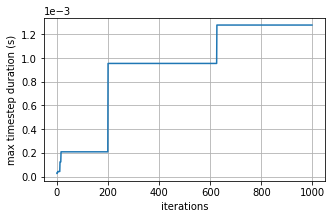

In [31]:
plt.figure(figsize=(12/2.54,8/2.54))
#plt.plot(decoupled_max, label='real time')
plt.plot(tp_decoupled_max, label='throughput')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
plt.xlabel('iterations')
plt.ylabel('max timestep duration (s)')
plt.grid()
ax = plt.gca()
#ax.legend()
plt.tight_layout()

plt.savefig('wscc_9bus_iter_tp_max.pdf')
pd_tp_decoupled_max_iterations = pd.DataFrame(tp_decoupled_max)
pd_tp_decoupled_max_iterations.to_csv('pd_tp_decoupled_max_iterations.csv')

In [32]:
tp_decoupled_concat = []
tp_decoupled_concat.append(tp_pd_decoupled_meas.query('sequence == 1')['values'].values[0][10:])

for seq in range(2,1001):
    tp_decoupled_concat.append( np.concatenate( (tp_decoupled_concat[-1], tp_pd_decoupled_meas.query('sequence == ' + str(seq))['values'].values[0][10:]), axis=0 ) )

In [21]:
tp_decoupled_mean = []
for seq in range(0,1000):
    tp_decoupled_mean.append(tp_decoupled_concat[seq].mean())

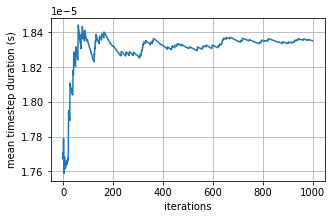

In [33]:
plt.figure(figsize=(12/2.54,8/2.54))
#plt.plot(decoupled_mean, label='real time')
plt.plot(tp_decoupled_mean, label='throughput')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
plt.xlabel('iterations')
plt.ylabel('mean timestep duration (s)')
plt.grid()
plt.tight_layout()

plt.savefig('wscc_9bus_iter_tp_mean.pdf')
pd_tp_decoupled_mean_iterations = pd.DataFrame(tp_decoupled_mean)
pd_tp_decoupled_mean_iterations.to_csv('pd_tp_decoupled_mean_iterations.csv')

In [34]:
tp_decoupled_std = []
for seq in range(0,1000):
    tp_decoupled_std.append(tp_decoupled_concat[seq].std())

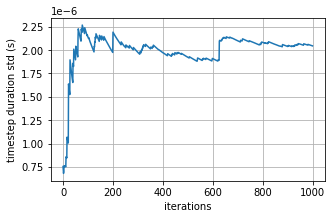

In [35]:
plt.figure(figsize=(12/2.54,8/2.54))
plt.plot(tp_decoupled_std)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
plt.xlabel('iterations')
plt.ylabel('timestep duration std (s)')
plt.grid()
plt.tight_layout()

plt.savefig('wscc_9bus_iter_tp_std.pdf')
pd_tp_decoupled_std_iterations = pd.DataFrame(tp_decoupled_std)
pd_tp_decoupled_std_iterations.to_csv('pd_tp_decoupled_std_iterations.csv')